In [1]:
import numpy as np
import pandas as pd

In [2]:
mydata = pd.read_csv(r'D:\Ongoing\5-6_gasification\dry-gasification\No_catalyst_phase.csv',encoding= 'unicode_escape')
X = mydata.values[:,2:11]
Y = mydata.values[:,11:14]
print(X,Y)

[[1.6 18.2 29.5 ... 800 0.0 0.3]
 [1.6 18.2 29.5 ... 800 0.0 0.3]
 [1.6 18.2 29.5 ... 800 0.0 0.3]
 ...
 [0.0 47.3 45.1 ... 600 0.0 0.0]
 [0.04 40.16 51.3 ... 600 0.0 0.0]
 [0.01 47.69 44.8 ... 600 0.0 0.0]] [[44.32 0.66 55.02]
 [44.24 1.25 54.51]
 [44.53 1.54 53.93]
 [43.53 0.56 55.91]
 [43.55 1.0 55.45]
 [45.19 1.32 53.49]
 [33.7 5.6 39.4]
 [33.5 5.6 42.0]
 [33.7 4.5 43.8]
 [32.6 7.7 40.0]
 [32.5 6.2 41.0]
 [32.6 3.7 43.1]
 [31.0 8.5 43.1]
 [31.0 7.9 44.8]
 [31.2 4.9 48.0]
 [32.4 7.0 49.4]
 [32.5 6.5 50.1]
 [48.89 1.81 49.3]
 [47.91 1.57 50.52]
 [47.98 1.16 50.86]
 [48.94 1.62 49.43]
 [47.14 1.08 51.79]
 [46.09 0.63 53.28]
 [46.54 1.09 52.37]
 [46.16 0.82 53.02]
 [44.72 0.51 54.77]
 [46.08 1.53 52.39]
 [44.92 1.04 54.03]
 [44.74 0.61 54.65]
 [45.94 1.51 52.55]
 [44.83 1.02 54.15]
 [44.83 0.6 54.56]
 [36.8 0.0 63.2]
 [40.1 0.0 59.9]
 [40.1 0.0 59.9]
 [40.7 0.0 59.3]
 [35.6 0.0 64.4]
 [39.2 0.0 60.8]
 [38.4 0.0 61.6]
 [40.0 0.0 60.0]
 [38.2 0.0 61.8]
 [48.94 1.62 49.43]
 [47.14 1.08 51

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

mm_X = StandardScaler()
mm_y = StandardScaler()
X=mm_X.fit_transform(X)
y=mm_y.fit_transform(Y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [6]:
"""hyper-parameter tuning ofRF, SVR, and NN using ten-fond cross validation"""
import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

#RF
# x =np.arange(1,101,10)
# y =np.arange(1,101,10)

#SVR
x=[0.1,0.5,1,5,10,50,100,1000]
y=[0.001,0.01,0.1,0.5,1,10]

#NN
# x=[2,4,16,32,64,128,256,512]
# y=[2,4,16,32,64,128,256,512]
#y=[0.0001,0.001,0.01,0.1]
#y=[2,4,16,32,64,128,256,512]
                                    
for i in x:
    for j in y:
#        model = RandomForestRegressor(n_estimators=i, max_depth=j,random_state=42)
        model = MultiOutputRegressor(SVR(kernel='rbf', gamma='auto', C=i, epsilon=j))
#        model=MLPRegressor(hidden_layer_sizes=(i,j), activation='relu', solver='adam')
        scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')#scoring='neg_mean_squared_error'

        Scores1=-np.mean(scores)
        Scores2=Scores1**1/2
        std=np.std(scores)     
        print(i,j,Scores2,std)
        

0.1 0.001 0.24944648667517435 0.3124070852070383
0.1 0.01 0.24920126390633915 0.3108812834108678
0.1 0.1 0.24322381182247046 0.2994400813348675
0.1 0.5 0.26149077235991414 0.2624694982464899
0.1 1 0.3703903425589986 0.1910489457060427
0.1 10 0.6694059930935061 0.21539182747258895
0.5 0.001 0.09309128486513203 0.16728466100289227
0.5 0.01 0.09320425937095957 0.16800181512008502
0.5 0.1 0.09424911338079281 0.1693395654922687
0.5 0.5 0.13983871672942816 0.16280976100568215
0.5 1 0.2908754945729282 0.1527813323108104
0.5 10 0.6694059930935061 0.21539182747258895
1 0.001 0.0883281723281229 0.1747858165956102
1 0.01 0.08830636241140208 0.17516889212008172
1 0.1 0.08884113730838632 0.17351077303823834
1 0.5 0.12736967849058217 0.16264822145511906
1 1 0.2764118920381317 0.15564903713993078
1 10 0.6694059930935061 0.21539182747258895
5 0.001 0.0907675936424131 0.19387470173502155
5 0.01 0.09079497913996323 0.19605037975582873
5 0.1 0.0861994281617595 0.18545987650144896
5 0.5 0.1192476857895683

In [7]:
"""hyper-paramter tuning of GBR and XGB"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

x =np.arange(1,80,5)
y =np.arange(3,20,2)

# x=[0.5,0.6,0.7,0.8]
# y =np.arange(3,20,2)
a=[]         
b=[]
c=[]                                       
for i in x:
    for j in y:
#        model =MultiOutputRegressor(GradientBoostingRegressor(n_estimators=i,max_depth=j, random_state=42))#,learning_rate=0.6,subsample=0.1
        model=MultiOutputRegressor(XGBRegressor(n_estimators=i,max_depth=j, random_state=42))#, ,max_depth=6, subsample=0.7
        scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')#scoring='neg_mean_squared_error'

        Scores1=-np.mean(scores)
        Scores2=Scores1**1/2
        std=np.std(scores)     
        print(i,j,Scores2,std)
       

1 3 0.39189640440296525 0.26572987220219496
1 5 0.38363757994113173 0.27879464148438093
1 7 0.3798692546789912 0.2797762921814704
1 9 0.3803039788362461 0.2794106755161966
1 11 0.38030131157831587 0.279444412081115
1 13 0.38030131157831587 0.279444412081115
1 15 0.38030131157831587 0.279444412081115
1 17 0.38030131157831587 0.279444412081115
1 19 0.38030131157831587 0.279444412081115
6 3 0.12119378751765883 0.25860925798619083
6 5 0.11717965611142071 0.29565789909514895
6 7 0.11449901833843754 0.2962948252143601
6 9 0.11612798486044744 0.2951031155659349
6 11 0.11700665126714815 0.29593274434235384
6 13 0.1169613525139442 0.2959407535710214
6 15 0.1169613525139442 0.2959407535710214
6 17 0.1169613525139442 0.2959407535710214
6 19 0.1169613525139442 0.2959407535710214
11 3 0.09376642472432775 0.24497668540749606
11 5 0.10197656847758038 0.30091292582662116
11 7 0.10268789898077366 0.30285400418731473
11 9 0.10364741738532131 0.2993873805891748
11 11 0.10468091240844231 0.300793078501548

In [8]:
x=[0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
y=[0.01,0.05,0.1,1]                                   
for i in x:
    for j in y:

        #model = MultiOutputRegressor(GradientBoostingRegressor(n_estimators=41,max_depth=4, learning_rate=j,subsample=i,random_state=42))
        model =MultiOutputRegressor(XGBRegressor(n_estimators=21,max_depth=5, learning_rate=j,subsample=i,random_state=42))
        scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')#scoring='neg_mean_squared_error'

        Scores1=-np.mean(scores)
        Scores2=Scores1**1/2
        std=np.std(scores)        
        print(i,j,Scores2,std)


0.2 0.01 0.5025238985955272 0.32441622451035534
0.2 0.05 0.23654068811210247 0.20610769296714404
0.2 0.1 0.1345230633660966 0.16171906223140176
0.2 1 0.23735692112007317 0.2799601144271072
0.3 0.01 0.4891073967713583 0.3103674051654682
0.3 0.05 0.20968992014810026 0.19090930661410419
0.3 0.1 0.12153775977059386 0.17695270785993272
0.3 1 0.18546658344865302 0.17286766532575193
0.4 0.01 0.48321451631276996 0.31210941207437504
0.4 0.05 0.2009638749303823 0.20253718510362784
0.4 0.1 0.11336454901970468 0.19196953967386896
0.4 1 0.12585577887103933 0.19323100369926757
0.5 0.01 0.47628959524995756 0.3004941903294089
0.5 0.05 0.18855253028777896 0.19739402855217048
0.5 0.1 0.10552443052378273 0.18178085404039943
0.5 1 0.13764582924528077 0.23993335806987054
0.6 0.01 0.4715701647629623 0.29805443834055045
0.6 0.05 0.18151160711509062 0.20321602831134036
0.6 0.1 0.1026518424602342 0.2014524106136625
0.6 1 0.11759166155218595 0.19132932740675745
0.7 0.01 0.4679414591114148 0.2967089823733218
0.7

In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import joblib
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

X = mydata.values[:,2:11]
Y = mydata.values[:,11:14]
mm_X = StandardScaler()
mm_y = StandardScaler()
X=mm_X.fit_transform(X)
y=mm_y.fit_transform(Y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

"""models with optimal hyper-parameters"""
#regr_rf = RandomForestRegressor(n_estimators=11, max_depth=11,random_state=42)
#regr_rf =MultiOutputRegressor(SVR(kernel='rbf', gamma='scale', C=10, epsilon=0.01))
#regr_rf=MultiOutputRegressor(MLPRegressor(hidden_layer_sizes=(64,64),solver='adam',activation='relu'))
#regr_rf = MultiOutputRegressor(XGBRegressor(n_estimators=21,learning_rate =0.1,subsample=0.7, max_depth=5,random_state=42))

from sklearn.ensemble import GradientBoostingRegressor

regr_rf=MultiOutputRegressor(GradientBoostingRegressor(learning_rate=0.1, subsample=0.6,random_state=42,n_estimators=41,max_depth=4))


"""cross validation score"""
# Scores1 = cross_val_score(regr_rf, X_train, y_train, cv=10, scoring='neg_mean_squared_error')#scoring='neg_mean_squared_error'
# scores2 = cross_val_score(regr_rf, X_train, y_train, cv=10, scoring='r2')#scoring='neg_mean_squared_error'

# Scores1=-Scores1
# print("score-rmse",Scores1,"score-r2",scores2,)
# Scores1=Scores1**0.5
# Scores1=np.mean(Scores1)

# Scores2=np.mean(scores2)

# print('CV-R2',np.around(Scores2,2),'CV-RMSE:',np.around(Scores1,2),)


"""model retrain and test"""

regr_rf.fit(X_train,y_train)

y_train_pre=regr_rf.predict(X_train)
y_test_pre=regr_rf.predict(X_test)

r=r2_score(y_train, y_train_pre,multioutput='raw_values')
r2=r2_score(y_test, y_test_pre,multioutput='raw_values')

train_MSE=mean_squared_error(y_train, y_train_pre,multioutput='raw_values')
train_RMSE=train_MSE**0.5
MSE=mean_squared_error(y_test, y_test_pre,multioutput='raw_values')
RMSE=MSE**0.5

print('train R2',np.around(r,2),'test R2:',np.around(r2,2),
      'train RMSE:',np.around(train_RMSE,2), 'test RMSE:',np.around(RMSE,2),)

train R2 [0.98 0.98 0.97] test R2: [0.96 0.96 0.9 ] train RMSE: [0.14 0.16 0.17] test RMSE: [0.23 0.19 0.27]


In [20]:
"""model prediction after the optimal values of inputs values were idenfied based on ML-based process interpretation"""

x_S =np.arange(1,1.5,0.2)
#x_O =np.arange(1,80,5)
x_C =np.arange(48,62,4)
x_H =np.arange(4,5,0.3)
x_N =np.arange(0,0.5,0.2)
x_ash =np.arange(1,5,2)
x_T =np.arange(800,1000,50)
x_SB =np.arange(2.7,3,0.1)
x_ER =np.arange(0,0.1,0.05)

S=[]
O=[]
C=[]
H=[]
N=[]
ash=[]
T=[]
SB=[]
ER=[]


for x0 in x_S:
    for x2 in x_C:
        for x3 in x_H:
            for x4 in x_N:
                for x5 in x_ash:
                    for x6 in x_T:
                        for x7 in x_SB:
                            for x8 in x_ER:
                                x1=100-x0-x2-x3-x4-x5
                                S.append(x0)
                                O.append(x1)
                                C.append(x2)
                                H.append(x3)
                                N.append(x4)
                                ash.append(x5)
                                T.append(x6)
                                SB.append(x7)
                                ER.append(x8)

S=pd.DataFrame(S)
O=pd.DataFrame(O)
C=pd.DataFrame(C)
H=pd.DataFrame(H)
N=pd.DataFrame(N)
ash=pd.DataFrame(ash)
T=pd.DataFrame(T)
SB=pd.DataFrame(SB)
ER=pd.DataFrame(ER)

xdata_generate=pd.concat([S,O,C,H,N,ash,T,SB,ER],axis=1)
print(xdata_generate)
             
yphase_pre=regr_rf.predict(xdata_generate)
yphase_pre = mm_y.inverse_transform(yphase_pre)
print(yphase_pre)

        0     0   0    0    0  0    0    0     0
0     1.0  46.0  48  4.0  0.0  1  800  2.7  0.00
1     1.0  46.0  48  4.0  0.0  1  800  2.7  0.05
2     1.0  46.0  48  4.0  0.0  1  800  2.8  0.00
3     1.0  46.0  48  4.0  0.0  1  800  2.8  0.05
4     1.0  46.0  48  4.0  0.0  1  800  2.9  0.00
...   ...   ...  ..  ...  ... ..  ...  ...   ...
6907  1.4  30.3  60  4.9  0.4  3  950  2.7  0.05
6908  1.4  30.3  60  4.9  0.4  3  950  2.8  0.00
6909  1.4  30.3  60  4.9  0.4  3  950  2.8  0.05
6910  1.4  30.3  60  4.9  0.4  3  950  2.9  0.00
6911  1.4  30.3  60  4.9  0.4  3  950  2.9  0.05

[6912 rows x 9 columns]
[[28.51497973  9.67333225 62.10933838]
 [28.51497973  9.67333225 62.10933838]
 [28.51497973  9.67333225 62.10933838]
 ...
 [34.83018056 10.19991318 61.43669021]
 [34.83018056 10.19991318 61.43669021]
 [34.83018056 10.19991318 61.43669021]]


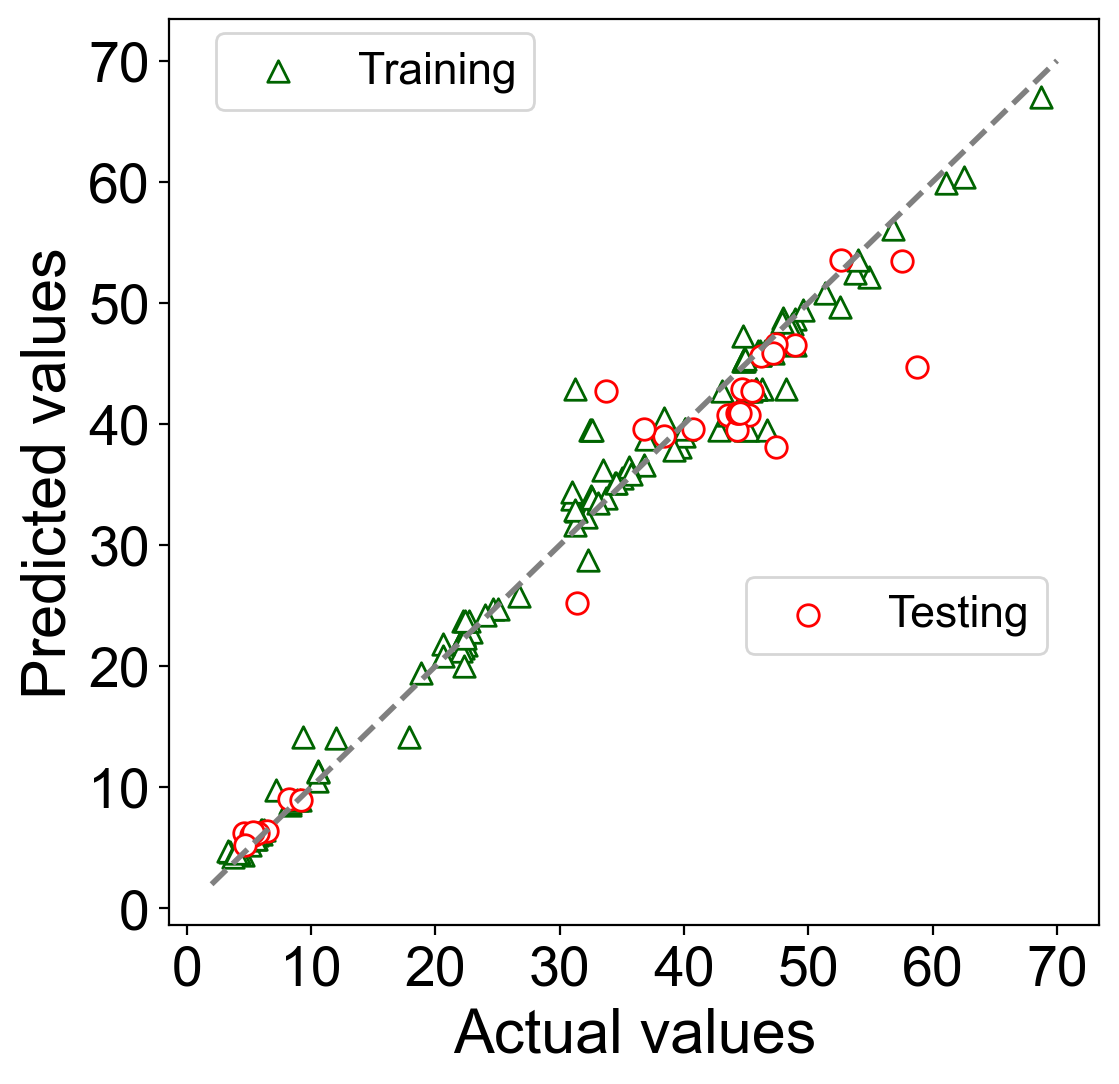

In [120]:
"""predictiion plot"""

import matplotlib.pyplot as plt
plt.figure(figsize=(6,6),dpi=200)#,facecolor="0.92")
#plt.subplot(221,facecolor="0.92")

p1=plt.scatter(y_train[:,0], y_train_pre[:,0], label='Training',s=60,marker='^',color='w',edgecolors='darkgreen')
p2=plt.scatter(y_test[:,0],y_test_pre[:,0],label='Testing',marker='o',s=60,color='w',edgecolors='red')
plt.xlabel('Actual values', fontsize=22,weight='normal') 
plt.ylabel('Predicted values', fontsize=22,weight='normal') 
plt.xticks(fontsize=20,weight='normal')
plt.yticks(fontsize=20,weight='normal')
m1=plt.legend(handles=[p1],fontsize=16,loc=(0.05,0.9),frameon=True)
x = np.linspace(2,70)
y = x
plt.plot(x, y, color='gray', linewidth=2, linestyle='--')   # linewidth 设置线的宽度， linesyyle设置线的形状
ax = plt.gca().add_artist(m1)
m2=plt.legend(handles=[p2],fontsize=16,loc=(0.62,0.3),frameon=True)

plt.show()
plt.rc('font',family='Arial',weight='normal')#,weight='bold'

In [30]:
"""train single task GBR model to get the feature importance and correlations for each target one by one"""

X = mydata.values[:,2:11]#.reshape(217,17)
y = mydata.values[:,13].reshape(150,1)
#print(mydata)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
regr_rf=GradientBoostingRegressor(learning_rate=0.1, subsample=0.6,random_state=42,n_estimators=41,max_depth=4)
regr_rf.fit(X_train,y_train)

y_train_pre=regr_rf.predict(X_train)
y_test_pre=regr_rf.predict(X_test)


r=r2_score(y_train, y_train_pre,multioutput='raw_values')
r2=r2_score(y_test, y_test_pre,multioutput='raw_values')

train_MSE=mean_squared_error(y_train, y_train_pre,multioutput='raw_values')

train_RMSE=train_MSE**0.5
MSE=mean_squared_error(y_test, y_test_pre,multioutput='raw_values')
RMSE=MSE**0.5

print('train R2',np.around(r,2),'test R2:',np.around(r2,2),
      'train RMSE:',np.around(train_RMSE,2), 'test RMSE:',np.around(RMSE,2),)

train R2 [0.97] test R2: [0.91] train RMSE: [2.94] test RMSE: [4.7]


C:\Users\Lenovo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature ranking:
1. feature 2 (0.305399)
2. feature 0 (0.217541)
3. feature 8 (0.190295)
4. feature 5 (0.071643)
5. feature 1 (0.057684)
6. feature 7 (0.053978)
7. feature 4 (0.047279)
8. feature 3 (0.040514)
9. feature 6 (0.015667)


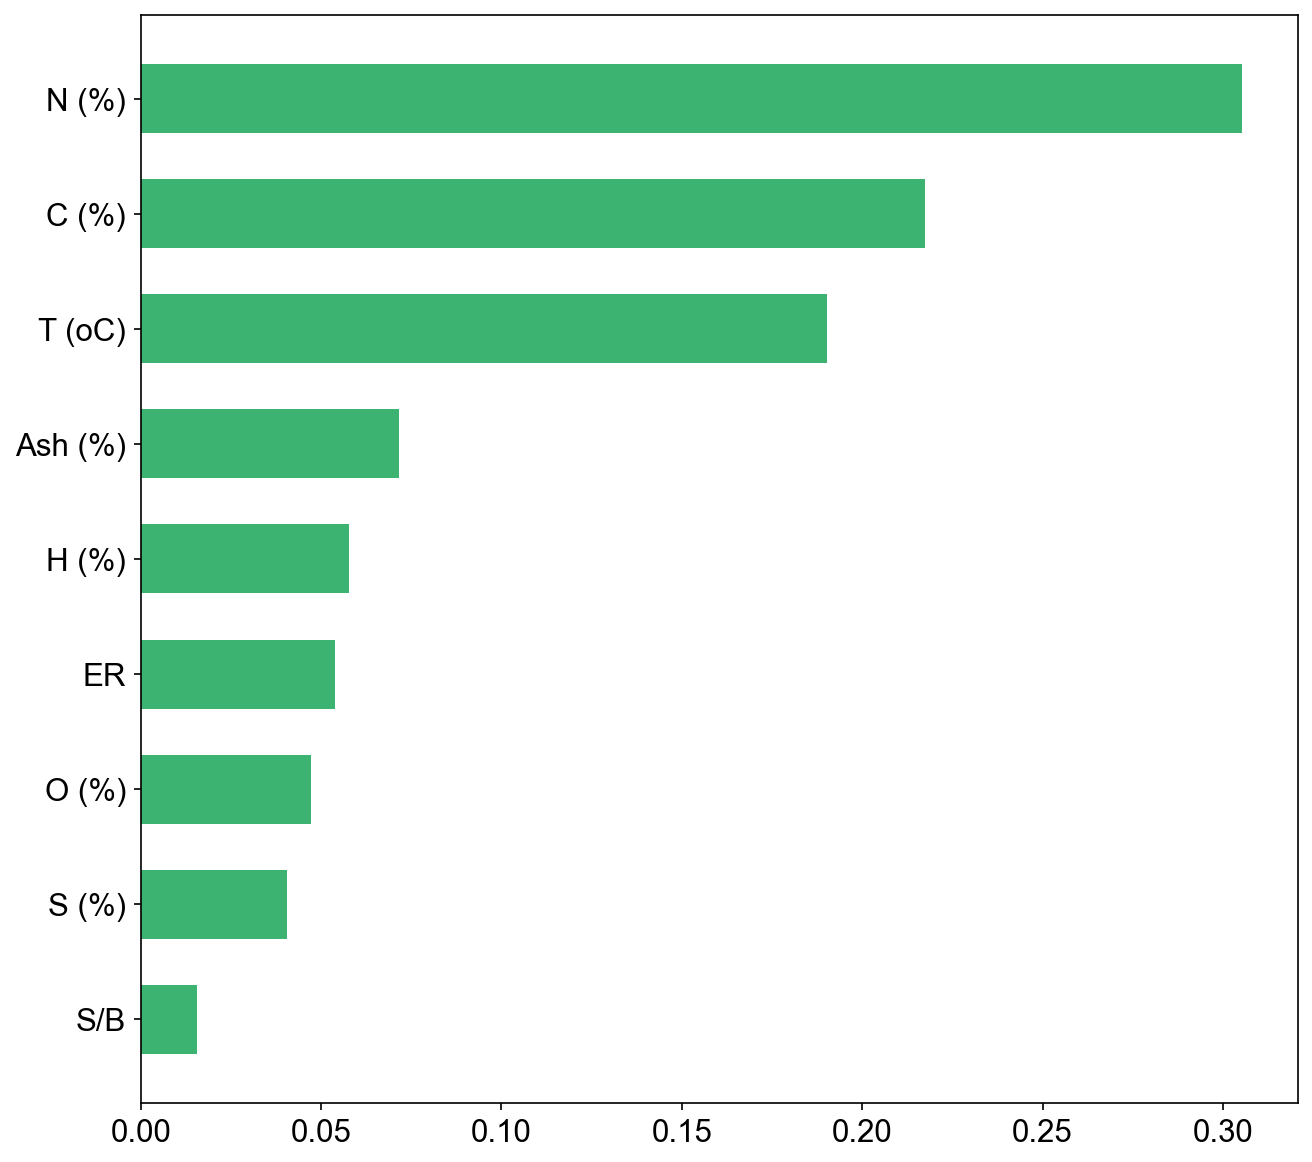

In [31]:
"""feature importance plot""""

import matplotlib as mpl
from cycler import cycler
mpl.rcParams.update({'font.size': 15, 'font.family': 'Arial', 'mathtext.fontset': 'stix',"figure.dpi":150 })
mpl.rcParams['axes.prop_cycle'] = cycler(color=[ 'mediumseagreen', 'b', 'y','r'])

importances = regr_rf.feature_importances_
indices = np.argsort(importances)[::-1]
#Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
   print("%d. feature %d (%f)" % (f + 1, indices[f],importances[indices[f]]))
# Plot the feature importances
fig, ax = plt.subplots(figsize=(9, 8))
y_ticks = np.arange(len(mydata.columns.values[2:11]))
ax.barh(y_ticks,importances[indices],height=0.6)
ax.set_yticklabels(mydata.columns[indices+2])
ax.set_yticks(y_ticks)
ax.invert_yaxis()
label_x = ax.get_xticklabels()
fig.tight_layout()
plt.show()

['C (%)' 'H (%)' 'N (%)' 'S (%)' 'O (%)' 'Ash (%)' 'S/B' 'ER' 'T (oC)']


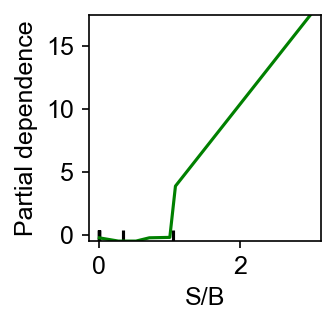

In [25]:
"""feature correlation plot"""
from sklearn.inspection import PartialDependenceDisplay
names=mydata.columns.values[2:11]
print(names)
features=['S/B']#,['C (%)' 'H (%)' 'N (%)' 'S (%)' 'O (%)' 'Ash (%)' 'S/B' 'ER' 'T (oC)']
import matplotlib as mpl
from cycler import cycler
mpl.rcParams.update({'font.size': 12, 'font.family': 'Arial', 'mathtext.fontset': 'stix',"figure.dpi":150 })
mpl.rcParams['axes.prop_cycle'] = cycler(color=[ 'g', 'b', 'y','r'])
mpl.rc('lines', linewidth=1.5)#, linestyle='-.'

_, ax = plt.subplots(ncols=1, figsize=(2,2))
display = PartialDependenceDisplay.from_estimator(
    regr_rf,
    X_train,
    features,
    feature_names=names,
    kind="average",
    n_jobs=3,
    grid_resolution=20,
    ax=ax
)
plt.show()